# Chlorophyll-a time series
Time Series Analysis of chlorophyll-a concentration.

### importing modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import time
from matplotlib import rcParams
import cartopy
%matplotlib inline
rcParams['figure.figsize'] = (15,10)

### importing data

In [5]:
chl_df = pd.read_csv("https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1chla8day_R202SQ.csv?chlor_a%5B(2004-02-22T00:00:00Z):1:(2012-02-22T00:00:00Z)%5D%5B(52.35416):1:(52.02083)%5D%5B(-175.7708):1:(-175.2708)%5D")

In [6]:
chl_df.loc[1:]

,time,latitude,longitude,chlor_a
1,2004-02-22T00:00:00Z,52.354164,-175.77083,0.36431733
2,2004-02-22T00:00:00Z,52.354164,-175.72917,0.36606562
3,2004-02-22T00:00:00Z,52.354164,-175.6875,0.3866254
4,2004-02-22T00:00:00Z,52.354164,-175.64583,0.38409266
5,2004-02-22T00:00:00Z,52.354164,-175.60417,0.35367963
...,...,...,...,...
36383,2012-02-22T00:00:00Z,52.020832,-175.4375,0.29411134
36384,2012-02-22T00:00:00Z,52.020832,-175.39583,0.2957206
36385,2012-02-22T00:00:00Z,52.020832,-175.35417,0.29755464
36386,2012-02-22T00:00:00Z,52.020832,-175.3125,0.29755464


In [7]:
def stamptodate(x):
    return time.mktime(dt.strptime(x[:10], "%Y-%m-%d").timetuple())

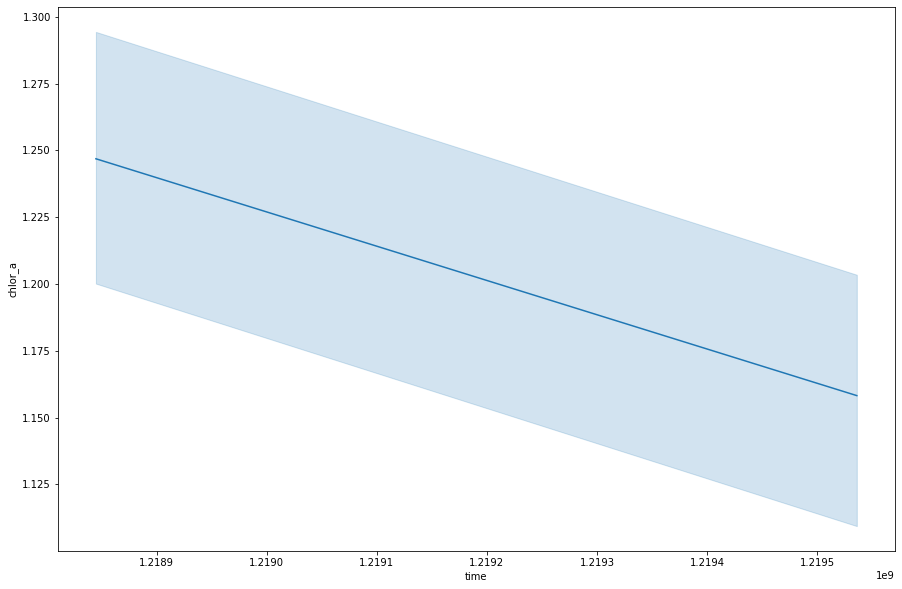

In [8]:
ax = sns.lineplot(x = chl_df.loc[1:].time[chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0-20*86400, 1218067200.0+21*86400)].apply(stamptodate),
                  y = chl_df.loc[1:]["chlor_a"].astype(float))
ax.set_figsize = (15,10)

In [9]:
print(f"NaN values are {len(chl_df.loc[1:][chl_df.loc[1:].chlor_a.isna()])/len(chl_df)*100} % of the total values.")

NaN values are 64.15851379575685 % of the total values.


Astonishingly high NaNs, isn't it? Let us look at dates at which entries are non-NaN.

In [10]:
chl_df.loc[1:][chl_df.loc[1:].chlor_a.notna()].time.unique()

array(['2004-02-22T00:00:00Z', '2004-03-01T00:00:00Z',
       '2004-03-09T00:00:00Z', '2004-03-17T00:00:00Z',
       '2004-03-25T00:00:00Z', '2004-04-02T00:00:00Z',
       '2004-04-10T00:00:00Z', '2004-04-18T00:00:00Z',
       '2004-04-26T00:00:00Z', '2004-05-04T00:00:00Z',
       '2004-05-12T00:00:00Z', '2004-05-20T00:00:00Z',
       '2004-06-05T00:00:00Z', '2004-06-13T00:00:00Z',
       '2004-06-21T00:00:00Z', '2004-06-29T00:00:00Z',
       '2004-07-15T00:00:00Z', '2004-07-23T00:00:00Z',
       '2004-08-08T00:00:00Z', '2004-08-16T00:00:00Z',
       '2004-09-09T00:00:00Z', '2004-09-17T00:00:00Z',
       '2004-09-25T00:00:00Z', '2004-10-03T00:00:00Z',
       '2004-10-11T00:00:00Z', '2004-10-19T00:00:00Z',
       '2004-10-27T00:00:00Z', '2004-11-04T00:00:00Z',
       '2005-01-29T00:00:00Z', '2005-02-06T00:00:00Z',
       '2005-02-14T00:00:00Z', '2005-02-22T00:00:00Z',
       '2005-03-02T00:00:00Z', '2005-03-10T00:00:00Z',
       '2005-03-18T00:00:00Z', '2005-03-26T00:00:00Z',
       '20

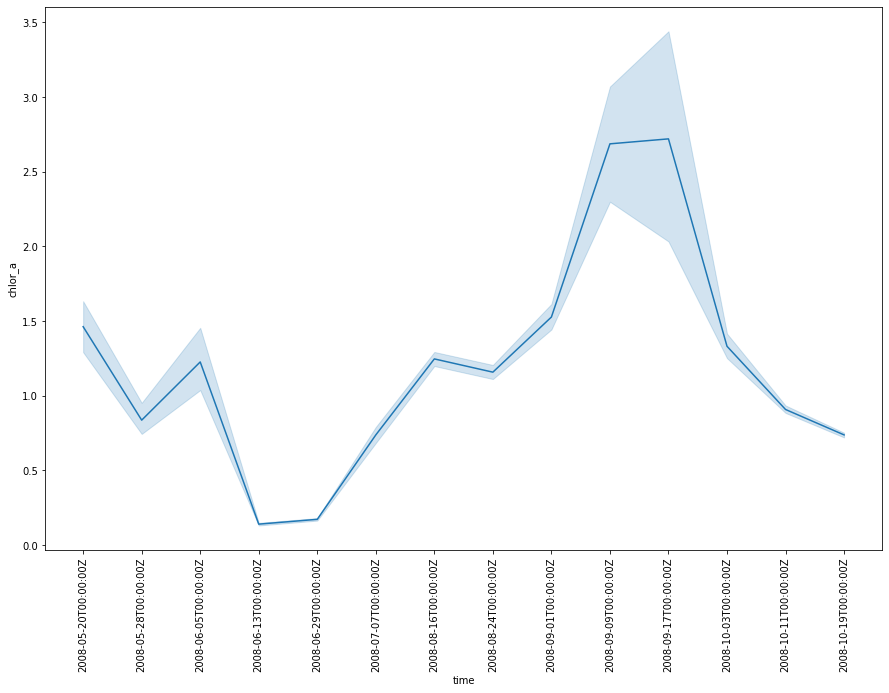

In [11]:
ax = sns.lineplot(x = chl_df[chl_df.time.isin(['2008-05-20T00:00:00Z', '2008-05-28T00:00:00Z',
       '2008-06-05T00:00:00Z', '2008-06-13T00:00:00Z',
       '2008-06-29T00:00:00Z', '2008-07-07T00:00:00Z',
       '2008-08-16T00:00:00Z', '2008-08-24T00:00:00Z',
       '2008-09-01T00:00:00Z', '2008-09-09T00:00:00Z',
       '2008-09-17T00:00:00Z', '2008-10-03T00:00:00Z',
       '2008-10-11T00:00:00Z', '2008-10-19T00:00:00Z',])].time,
             y = chl_df[chl_df.time.isin(['2008-05-20T00:00:00Z', '2008-05-28T00:00:00Z',
       '2008-06-05T00:00:00Z', '2008-06-13T00:00:00Z',
       '2008-06-29T00:00:00Z', '2008-07-07T00:00:00Z',
       '2008-08-16T00:00:00Z', '2008-08-24T00:00:00Z',
       '2008-09-01T00:00:00Z', '2008-09-09T00:00:00Z',
       '2008-09-17T00:00:00Z', '2008-10-03T00:00:00Z',
       '2008-10-11T00:00:00Z', '2008-10-19T00:00:00Z',])].chlor_a.astype(float),
            )
plt.xticks(rotation=90);

#### Let us see the spatial variation of these points

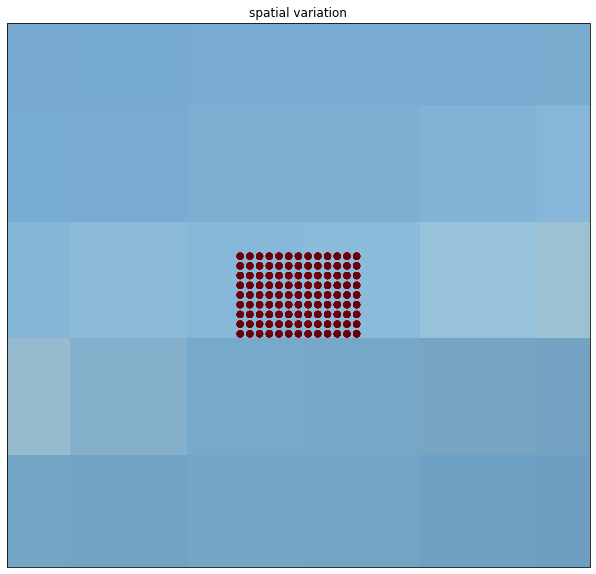

In [12]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x=chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].longitude.astype(float),
           y=chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].latitude.astype(float),
           c = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].time.apply(stamptodate),
           cmap="Reds",
           transform=cartopy.crs.PlateCarree()
          )
ax.set_xlim(chl_df.loc[1:].longitude.astype(float).min()-1,chl_df.loc[1:].longitude.astype(float).max()+1 )
ax.set_ylim(chl_df.loc[1:].latitude.astype(float).min()-1,chl_df.loc[1:].latitude.astype(float).max()+1 )

ax.set_title("spatial variation")
plt.show()

These points are distributed equally over time, and thus there is no point of smapling/coverage bias.

### time-series analysis

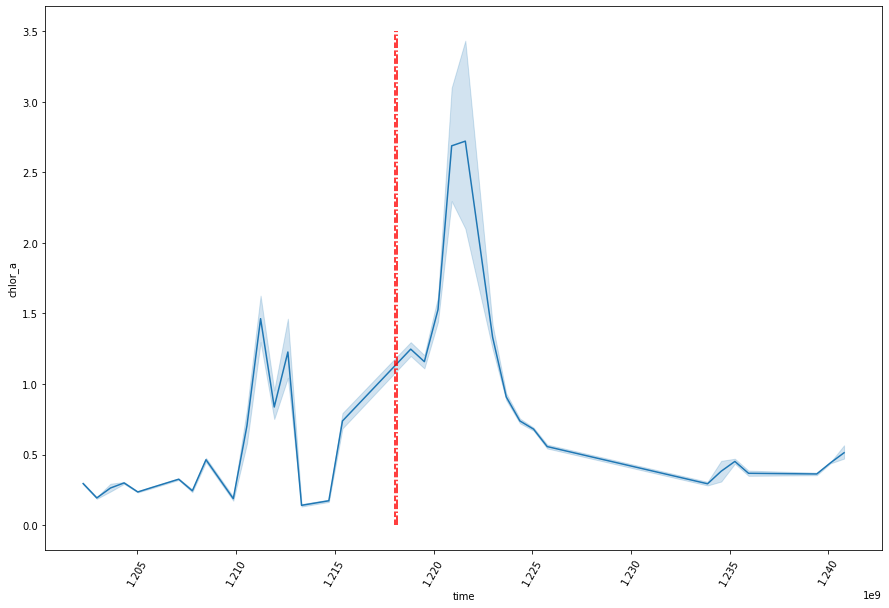

In [13]:
ax = sns.lineplot(x = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270 *86400, 1218067200.0 + 270*86400)].time.apply(stamptodate),
             y = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].chlor_a.astype(float),
            )
plt.plot([stamptodate("2008-08-07")]*2,[0,3.5], color="red", linestyle="--")
plt.plot([stamptodate("2008-08-08")]*2,[0,3.5], color="red", linestyle="-.")
plt.xticks(rotation=60);

## heatmap on map

In [14]:
chl_df.loc[1:].chlor_a = chl_df.loc[1:].chlor_a.astype(float)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


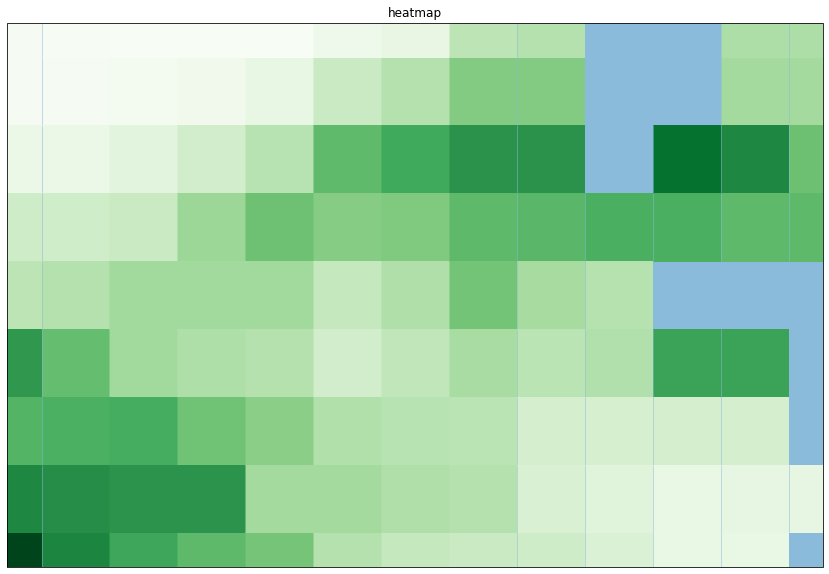

In [15]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

verts = list(zip([-0.041656494140625, 0.041656494140625, 0.041656494140625, -0.041656494140625],[-0.041656494140625, -0.041656494140625, 0.041656494140625, 0.041656494140625]))
ax.scatter(
    x = chl_df[chl_df["time"] == '2008-07-07T00:00:00Z']["longitude"].astype(float),
    y = chl_df[chl_df["time"] == '2008-07-07T00:00:00Z']["latitude"].astype(float),
    c = chl_df[chl_df["time"] == '2008-07-07T00:00:00Z']["chlor_a"].astype(float),
    cmap="Greens",
    transform=cartopy.crs.PlateCarree(),
    marker = verts,
    s = [67.256494140625**2]*len(chl_df[chl_df["time"] == '2008-07-07T00:00:00Z']),
)

ax.set_xlim(chl_df.longitude.loc[1:].astype(float).min(), chl_df.longitude.loc[1:].astype(float).max())
ax.set_ylim(chl_df.latitude.loc[1:].astype(float).min(), chl_df.latitude.loc[1:].astype(float).max())
ax.set_title("heatmap")
plt.show()

### Findings
+ We can put a data story contrasting the spike and the trough that post-eruption, phytoplankton density might have increased by a huge margin which stabilised later on to normal levels.
+ We can put a geospatial heatmap of chl-a concentration contrasting those two points (peak and trough).

### Polygon for Island

In [26]:
island = [
[-175.4951763, 52.1758258],
[-175.4962063, 52.1771410],
[-175.4963779, 52.1778774],
[-175.4970646, 52.1788243],
[-175.4976654, 52.1796133],
[-175.4985237, 52.1802971],
[-175.4988027, 52.1806380],
[-175.4981089, 52.1807915],
[-175.4981232, 52.1809436],
[-175.4985309, 52.1809042],
[-175.4987025, 52.1807990],
[-175.4990458, 52.1808253],
[-175.4992175, 52.1810620],
[-175.4992604, 52.1812987],
[-175.4995823, 52.1814696],
[-175.5000544, 52.1816406],
[-175.5003762, 52.1817720],
[-175.5007410, 52.1819035],
[-175.5012345, 52.1819824],
[-175.5016851, 52.1820876],
[-175.5023074, 52.1822060],
[-175.5025649, 52.1823243],
[-175.5030155, 52.1822849],
[-175.5035090, 52.1824295],
[-175.5037665, 52.1826136],
[-175.5040669, 52.1826662],
[-175.5045390, 52.1826662],
[-175.5048609, 52.1825742],
[-175.5050755, 52.1826662],
[-175.5053544, 52.1826662],
[-175.5059123, 52.1825873],
[-175.5065060, 52.1828283],
[-175.5069137, 52.1831307],
[-175.5073857, 52.1832754],
[-175.5077076, 52.1834989],
[-175.5078363, 52.1838014],
[-175.5082226, 52.1837488],
[-175.5086303, 52.1839065],
[-175.5091882, 52.1837488],
[-175.5097246, 52.1836173],
[-175.5101538, 52.1837356],
[-175.5106258, 52.1839460],
[-175.5110121, 52.1841169],
[-175.5114412, 52.1842353],
[-175.5118060, 52.1843273],
[-175.5124283, 52.1843536],
[-175.5128574, 52.1843273],
[-175.5127645, 52.1846692],
[-175.5128717, 52.1849453],
[-175.5132580, 52.1850374],
[-175.5136228, 52.1849059],
[-175.5139232, 52.1850637],
[-175.5142450, 52.1852740],
[-175.5144811, 52.1853792],
[-175.5145884, 52.1855633],
[-175.5149531, 52.1854976],
[-175.5149531, 52.1853661],
[-175.5151677, 52.1852740],
[-175.5154037, 52.1852477],
[-175.5158544, 52.1852740],
[-175.5160689, 52.1854844],
[-175.5163908, 52.1854187],
[-175.5167341, 52.1854844],
[-175.5168200, 52.1856028],
[-175.5171204, 52.1854187],
[-175.5172491, 52.1853135],
[-175.5173349, 52.1850900],
[-175.5174637, 52.1849059],
[-175.5178499, 52.1848533],
[-175.5181932, 52.1849716],
[-175.5183434, 52.1850900],
[-175.5187726, 52.1850111],
[-175.5185795, 52.1848270],
[-175.5185580, 52.1846166],
[-175.5184293, 52.1843668],
[-175.5181932, 52.1841695],
[-175.5180430, 52.1839065],
[-175.5182362, 52.1836304],
[-175.5185795, 52.1834595],
[-175.5188370, 52.1831439],
[-175.5191803, 52.1830124],
[-175.5196095, 52.1828678],
[-175.5198026, 52.1826442],
[-175.5200815, 52.1825653],
[-175.5204248, 52.1825653],
[-175.5207253, 52.1824338],
[-175.5210471, 52.1822497],
[-175.5214119, 52.1820919],
[-175.5222487, 52.1819078],
[-175.5228066, 52.1817895],
[-175.5232787, 52.1819473],
[-175.5234289, 52.1822366],
[-175.5239868, 52.1824338],
[-175.5243731, 52.1824601],
[-175.5248880, 52.1824601],
[-175.5254459, 52.1824338],
[-175.5258679, 52.1819736],
[-175.5261469, 52.1817500],
[-175.5265331, 52.1816185],
[-175.5264473, 52.1812240],
[-175.5263186, 52.1807769],
[-175.5261469, 52.1805665],
[-175.5259109, 52.1804219],
[-175.5255246, 52.1804876],
[-175.5252671, 52.1801063],
[-175.5254173, 52.1797775],
[-175.5255461, 52.1795803],
[-175.5257607, 52.1793436],
[-175.5259538, 52.1788701],
[-175.5260825, 52.1787649],
[-175.5265760, 52.1785151],
[-175.5267692, 52.1786597],
[-175.5271125, 52.1787518],
[-175.5274343, 52.1786203],
[-175.5278420, 52.1785019],
[-175.5282068, 52.1783836],
[-175.5284214, 52.1785414],
[-175.5287862, 52.1785940],
[-175.5290866, 52.1786466],
[-175.5294728, 52.1787518],
[-175.5298162, 52.1785414],
[-175.5300522, 52.1782389],
[-175.5301809, 52.1779101],
[-175.5297804, 52.1776515],
[-175.5294156, 52.1774542],
[-175.5290508, 52.1772307],
[-175.5286217, 52.1771386],
[-175.5283856, 52.1771386],
[-175.5283213, 52.1765074],
[-175.5286217, 52.1757446],
[-175.5289006, 52.1751922],
[-175.5291367, 52.1748108],
[-175.5294585, 52.1744557],
[-175.5296731, 52.1740480],
[-175.5298662, 52.1737323],
[-175.5299163, 52.1729992],
[-175.5298305, 52.1723416],
[-175.5297661, 52.1719602],
[-175.5293870, 52.1713332],
[-175.5291939, 52.1708071],
[-175.5291080, 52.1702810],
[-175.5290008, 52.1697812],
[-175.5287862, 52.1694918],
[-175.5284786, 52.1689456],
[-175.5280709, 52.1683406],
[-175.5276418, 52.1675908],
[-175.5270410, 52.1668663],
[-175.5268049, 52.1662086],
[-175.5260968, 52.1651686],
[-175.5254960, 52.1644583],
[-175.5248523, 52.1639179],
[-175.5242085, 52.1633916],
[-175.5235219, 52.1628260],
[-175.5233073, 52.1626813],
[-175.5221701, 52.1622077],
[-175.5215693, 52.1619314],
[-175.5215049, 52.1618130],
[-175.5200243, 52.1612465],
[-175.5189514, 52.1606282],
[-175.5172992, 52.1600091],
[-175.5160975, 52.1591408],
[-175.5147243, 52.1583908],
[-175.5134368, 52.1575883],
[-175.5122352, 52.1568208],
[-175.5111623, 52.1563734],
[-175.5100679, 52.1559524],
[-175.5093598, 52.1557419],
[-175.5086303, 52.1556366],
[-175.5078578, 52.1555314],
[-175.5068278, 52.1554524],
[-175.5058837, 52.1554129],
[-175.5049825, 52.1554393],
[-175.5037379, 52.1554393],
[-175.5024290, 52.1555577],
[-175.5012918, 52.1556893],
[-175.5003476, 52.1559963],
[-175.4992747, 52.1563509],
[-175.4985237, 52.1567851],
[-175.4976439, 52.1570745],
[-175.4968500, 52.1575219],
[-175.4960275, 52.1580412],
[-175.4954338, 52.1582981],
[-175.4948115, 52.1586928],
[-175.4942107, 52.1592059],
[-175.4936957, 52.1597862],
[-175.4933524, 52.1601283],
[-175.4928160, 52.1602467],
[-175.4926658, 52.1606282],
[-175.4924726, 52.1608914],
[-175.4922581, 52.1610755],
[-175.4920864, 52.1613255],
[-175.4918289, 52.1615097],
[-175.4918933, 52.1616675],
[-175.4917002, 52.1618123],
[-175.4915714, 52.1621280],
[-175.4916358, 52.1627770],
[-175.4917645, 52.1631453],
[-175.4918718, 52.1634742],
[-175.4919577, 52.1638294],
[-175.4921722, 52.1640662],
[-175.4925871, 52.1652458],
[-175.4927802, 52.1657325],
[-175.4931450, 52.1662323],
[-175.4935527, 52.1670216],
[-175.4935741, 52.1672189],
[-175.4937029, 52.1676530],
[-175.4939604, 52.1681002],
[-175.4943037, 52.1690341],
[-175.4942608, 52.1693893],
[-175.4941750, 52.1695603],
[-175.4941320, 52.1699812],
[-175.4939604, 52.1702705],
[-175.4938745, 52.1706914],
[-175.4938316, 52.1710203],
[-175.4936600, 52.1714149],
[-175.4934239, 52.1715201],
[-175.4927802, 52.1717042],
[-175.4924583, 52.1719147],
[-175.4926729, 52.1720988],
[-175.4924583, 52.1723618],
[-175.4921150, 52.1722961],
[-175.4918146, 52.1723618],
[-175.4919577, 52.1728090],
[-175.4921293, 52.1731510],
[-175.4921508, 52.1734140],
[-175.4924941, 52.1734140],
[-175.4929233, 52.1737823],
[-175.4933310, 52.1738612],
[-175.4938245, 52.1743610],
[-175.4933739, 52.1746503],
[-175.4932666, 52.1748082],
[-175.4937387, 52.1749397],
[-175.4940176, 52.1751501],
[-175.4937816, 52.1753605],
[-175.4937172, 52.1755709],
[-175.4939532, 52.1756893],
[-175.4943609, 52.1756893],
[-175.4947901, 52.1757288],
[-175.4952192, 52.1757025],
[-175.4952192, 52.1758208],
[-175.4951763, 52.1758258],
]

#### Let us see the island

<AxesSubplot:xlabel='lon', ylabel='lat'>

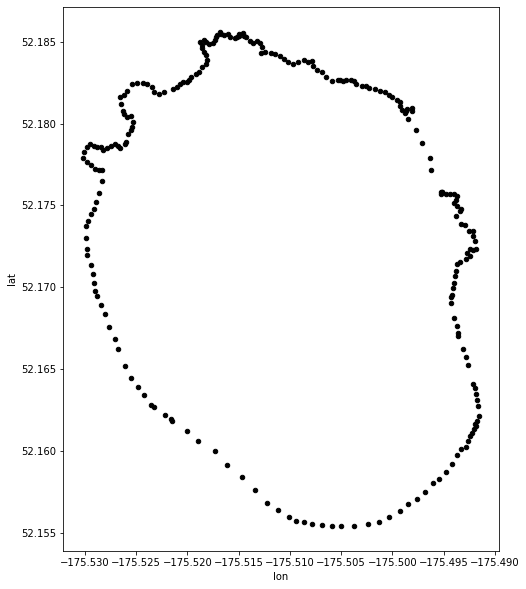

In [37]:
ks = pd.DataFrame(island, columns = ["lon", "lat"])
ks.plot.scatter(x = "lon", y="lat", color="black", figsize=(7.8, 10))

In [36]:
(ks.lat.max()-ks.lat.min())/(ks.lon.max()-ks.lon.min())*10

7.819293179137511

In [42]:
temp = chl_df[chl_df["time"] == '2008-08-16T00:00:00Z']
temp.loc[:, "longitude"] = temp.loc[:, "longitude"].astype(float)
temp.loc[:, "latitude"] = temp.loc[:, "latitude"].astype(float)
temp.loc[:, "chlor_a"] = temp.loc[:, "chlor_a"].astype(float)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


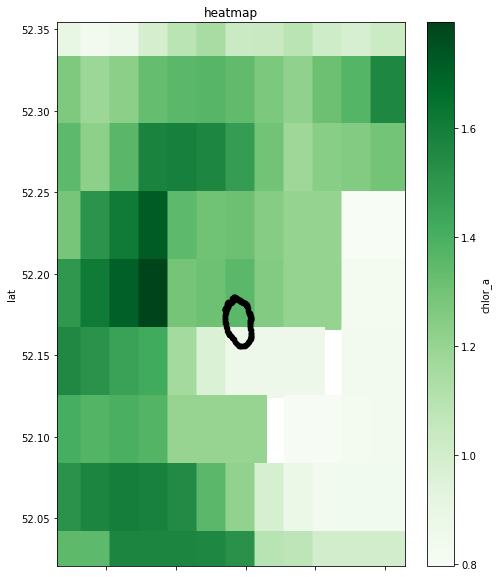

In [51]:
verts = list(zip([-0.041656494140625, 0.041656494140625, 0.041656494140625, -0.041656494140625],[-0.041656494140625, -0.041656494140625, 0.041656494140625, 0.041656494140625]))

ax = temp.plot.scatter(x = "longitude",
                       y = "latitude",
                       c = "chlor_a",
                       cmap="Greens",
                       marker = verts,
                       s = [69.456494140625**2]*len(chl_df[chl_df["time"] == '2008-08-16T00:00:00Z']),
                       colorbar = True
                      )
ks.plot.scatter(x = "lon", y="lat", color="black", figsize=(7.8,10), ax = ax)
plt.xlim([chl_df.longitude.loc[1:].astype(float).min(), chl_df.longitude.loc[1:].astype(float).max()])
plt.ylim([chl_df.latitude.loc[1:].astype(float).min(), chl_df.latitude.loc[1:].astype(float).max()])
plt.xlabel("lon")
plt.title("heatmap")
plt.show()

In [53]:
def generate_heatmap(date):
    temp = chl_df[chl_df["time"] == date]
    temp.loc[:, "longitude"] = temp.loc[:, "longitude"].astype(float)
    temp.loc[:, "latitude"] = temp.loc[:, "latitude"].astype(float)
    temp.loc[:, "chlor_a"] = temp.loc[:, "chlor_a"].astype(float)
    verts = list(zip([-0.041656494140625, 0.041656494140625, 0.041656494140625, -0.041656494140625],[-0.041656494140625, -0.041656494140625, 0.041656494140625, 0.041656494140625]))

    ax = temp.plot.scatter(x = "longitude",
                           y = "latitude",
                           c = "chlor_a",
                           cmap="Greens",
                           marker = verts,
                           s = [69.456494140625**2]*len(chl_df[chl_df["time"] == '2008-08-16T00:00:00Z']),
                           colorbar = True
                          )
    ks.plot.scatter(x = "lon", y="lat", color="black", figsize=(7.8,10), ax = ax)
    plt.xlim([chl_df.longitude.loc[1:].astype(float).min(), chl_df.longitude.loc[1:].astype(float).max()])
    plt.ylim([chl_df.latitude.loc[1:].astype(float).min(), chl_df.latitude.loc[1:].astype(float).max()])
    plt.xlabel("lon")
    plt.title("heatmap")
    return plt.show()

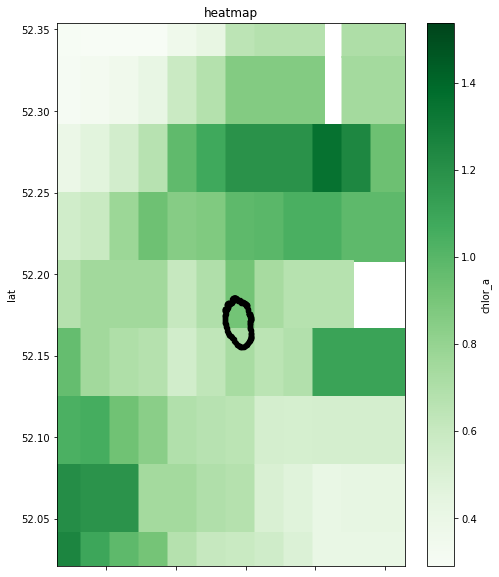

In [55]:
generate_heatmap("2008-07-07T00:00:00Z")

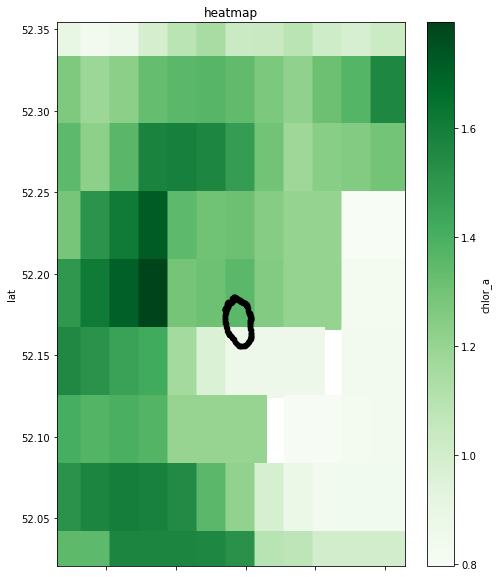

In [56]:
generate_heatmap("2008-08-16T00:00:00Z")

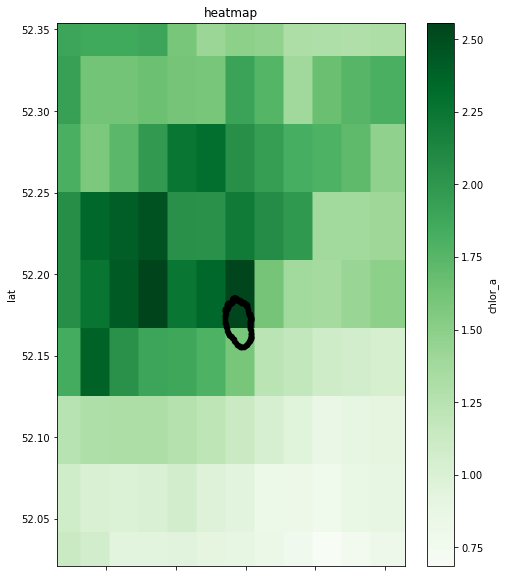

In [57]:
generate_heatmap("2008-09-01T00:00:00Z")

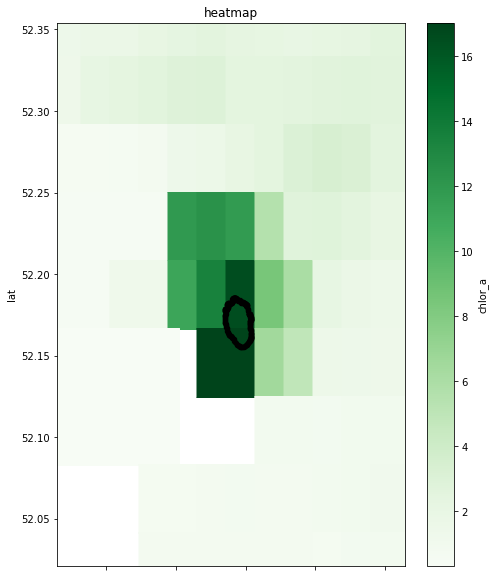

In [60]:
generate_heatmap("2008-09-17T00:00:00Z")

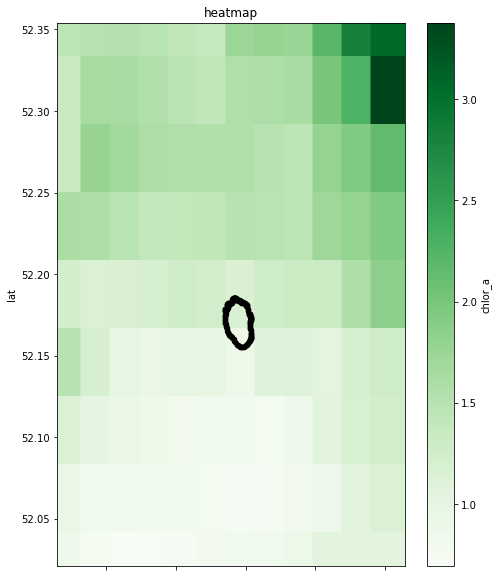

In [61]:
generate_heatmap("2008-10-03T00:00:00Z")

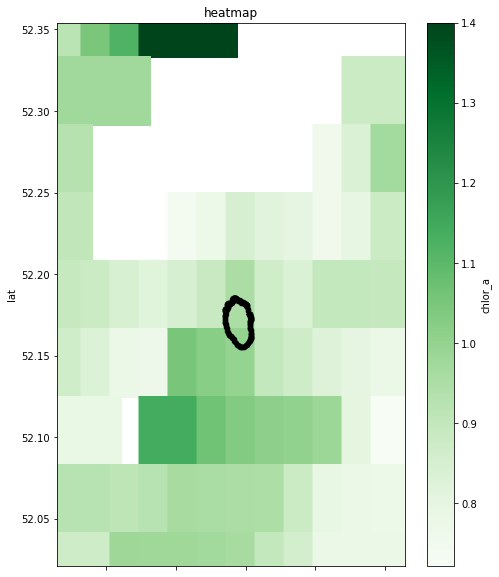

In [62]:
generate_heatmap("2008-10-11T00:00:00Z")